Importar Dataset Heart Disease Cleveland UCI

In [ ]:
import pandas as pd
heart_data = pd.read_csv(r'C:\Users\Admin\OneDrive\Documents\Dataset Regresión Logística\heart_cleveland_upload.csv')


1. ANÁLISIS EXPLORATORIO DE DATOS (EDA)

1.1 Visualización de la Estructura de los Datos

Inspeccionar las primeras filas del dataset y observa la disposición de columnas

In [21]:
heart_data.head()  # Muestra las primeras filas

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


Verificar el tipo de datos y la cantidad de valores no nulos en cada columna

In [23]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


Obtener estadísticas básicas de las columnas numéricas

In [25]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


1.2 Análisis de la Distribución de Variables Numéricas

Crear histogramas para ver la distribución de cada variable y detectar posibles sesgos y tendencias

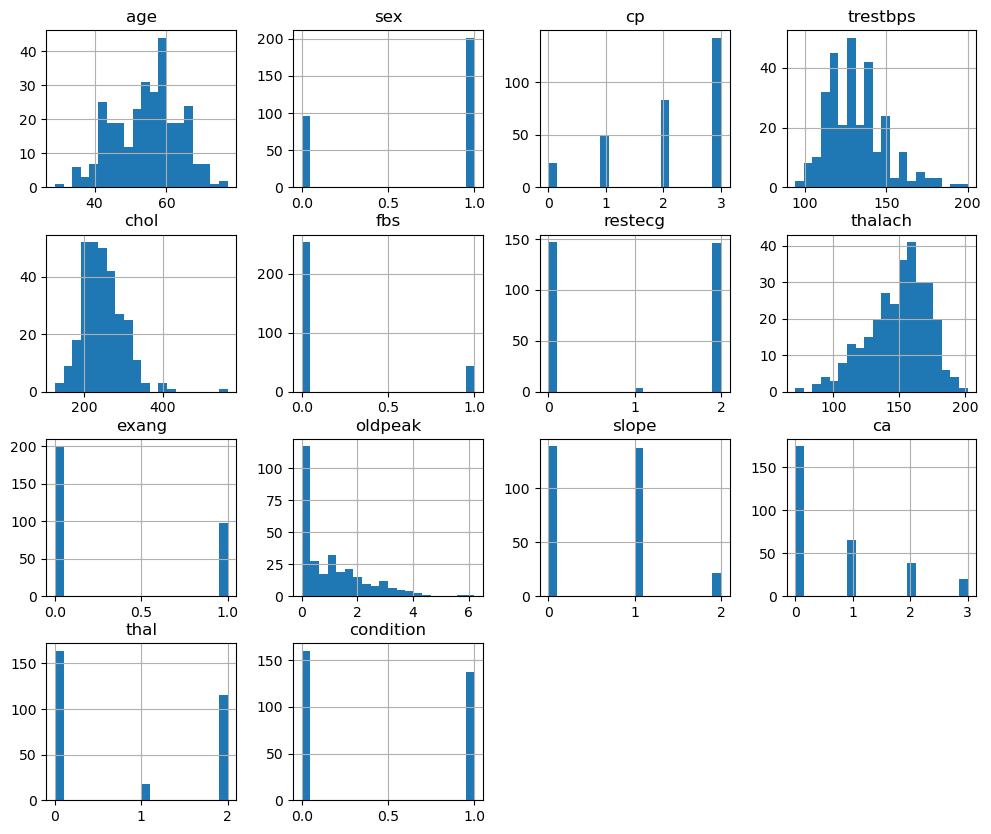

In [34]:
import matplotlib.pyplot as plt

heart_data.hist(figsize=(12, 10), bins=20)
plt.show()

1.3 Análisis de Correlación

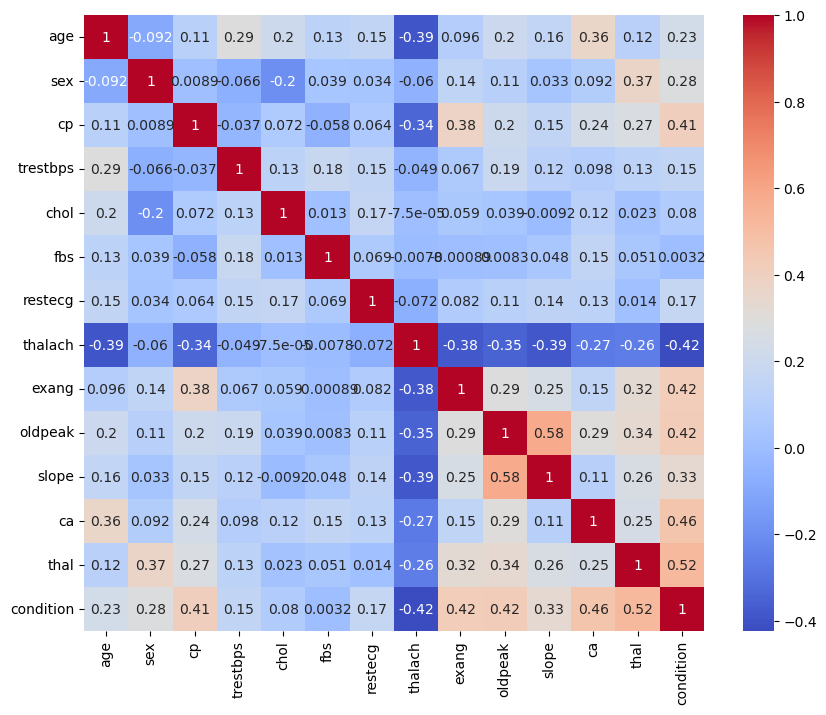

In [30]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(heart_data.corr(), annot=True, cmap='coolwarm')
plt.show()

1.4 Detección de Valores Atípicos

Usar boxplots para observar valores atípicos en variables clave

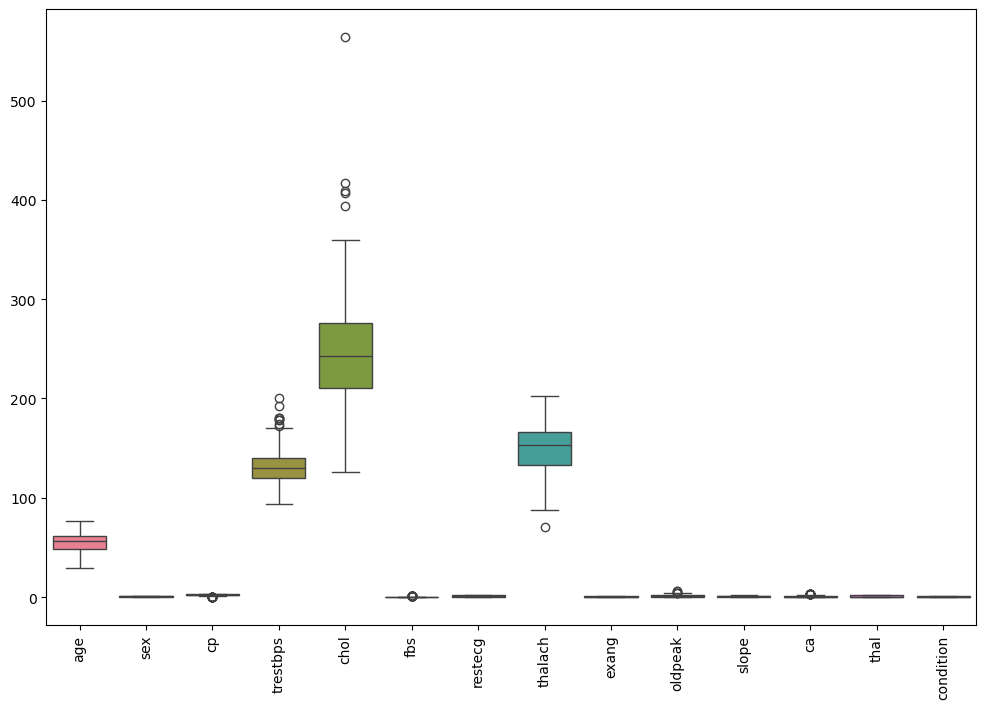

In [32]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=heart_data)
plt.xticks(rotation=90)
plt.show()

2. PREPROCESAMIENTO DE DATOS

2.1 Valores Faltantes

In [36]:
heart_data.isnull().sum()  # Verifica valores faltantes

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

2.2 Estandarización de las Variables Numéricas

In [50]:
print(heart_data.columns)

Index(['age_34', 'age_35', 'age_37', 'age_38', 'age_39', 'age_40', 'age_41',
       'age_42', 'age_43', 'age_44',
       ...
       'oldpeak_5.6', 'oldpeak_6.2', 'slope_1', 'slope_2', 'ca_1', 'ca_2',
       'ca_3', 'thal_1', 'thal_2', 'condition_1'],
      dtype='object', length=385)


In [59]:
# Importar el escalador de sklearn
from sklearn.preprocessing import StandardScaler

# Separar las características (variables predictoras) y la variable objetivo (condición)
# Cambia 'condition' por 'condition_1' para que coincida con el nombre generado en la codificación de variables categóricas
features = heart_data.drop(columns=['condition_1'])  # Variables predictoras
target = heart_data['condition_1']  # Variable objetivo

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar las características
features_scaled = scaler.fit_transform(features)

# Opcional: Crear un nuevo DataFrame para visualizar los datos estandarizados
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# Imprimir un resumen de los datos estandarizados para ver la media y desviación estándar
print(features_scaled_df.describe())

             age_34        age_35        age_37        age_38        age_39  \
count  2.970000e+02  2.970000e+02  2.970000e+02  2.970000e+02  2.970000e+02   
mean   5.980999e-18  5.980999e-18  1.196200e-17 -2.990500e-17  2.392400e-17   
std    1.001688e+00  1.001688e+00  1.001688e+00  1.001688e+00  1.001688e+00   
min   -8.233870e-02 -1.168412e-01 -8.233870e-02 -5.812382e-02 -1.168412e-01   
25%   -8.233870e-02 -1.168412e-01 -8.233870e-02 -5.812382e-02 -1.168412e-01   
50%   -8.233870e-02 -1.168412e-01 -8.233870e-02 -5.812382e-02 -1.168412e-01   
75%   -8.233870e-02 -1.168412e-01 -8.233870e-02 -5.812382e-02 -1.168412e-01   
max    1.214496e+01  8.558621e+00  1.214496e+01  1.720465e+01  8.558621e+00   

             age_40        age_41        age_42        age_43      age_44  \
count  2.970000e+02  2.970000e+02  2.970000e+02  2.970000e+02  297.000000   
mean  -2.093350e-17 -2.990500e-17  4.784800e-17  4.784800e-17    0.000000   
std    1.001688e+00  1.001688e+00  1.001688e+00  1.001688

3. SELECCIÓN DE CARACTERISTICAS RELEVANTES PARA EL MODELO DE REGRESIÓN LOGÍSTICA

In [63]:
from sklearn.feature_selection import SelectKBest, f_classif

# Seleccionar las características más relevantes
selector = SelectKBest(score_func=f_classif, k='all')  # Puedes ajustar 'k' según lo que necesites
selector.fit(features_scaled, target)

# Listar las características seleccionadas usando los nombres originales
selected_indices = selector.get_support(indices=True)
selected_feature_names = features.columns[selected_indices]  # Usar 'features' para obtener los nombres
print("Características seleccionadas para regresión logística:", selected_feature_names)

Características seleccionadas para regresión logística: Index(['age_34', 'age_35', 'age_37', 'age_38', 'age_39', 'age_40', 'age_41',
       'age_42', 'age_43', 'age_44',
       ...
       'oldpeak_4.4', 'oldpeak_5.6', 'oldpeak_6.2', 'slope_1', 'slope_2',
       'ca_1', 'ca_2', 'ca_3', 'thal_1', 'thal_2'],
      dtype='object', length=384)


In [65]:
import pandas as pd

# Obtener los puntajes y p-valores
scores = selector.scores_
p_values = selector.pvalues_

# Crear un DataFrame para visualizar los puntajes
feature_scores = pd.DataFrame({
    'Feature': features.columns,
    'Score': scores,
    'P-Value': p_values
})

# Ordenar por puntaje
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print(feature_scores.head(10))  # Mostrar las 10 características más relevantes


     Feature       Score       P-Value
43      cp_3  102.084176  8.337995e-21
383   thal_2   90.566585  6.693824e-19
337  exang_1   63.680253  3.272490e-14
377  slope_1   41.084540  5.763693e-10
42      cp_2   30.332572  7.926602e-08
40     sex_1   24.798347  1.085076e-06
380     ca_2   23.643882  1.887906e-06
41      cp_1   19.255618  1.593848e-05
379     ca_1   16.322292  6.820700e-05
381     ca_3   13.546209  2.766746e-04


4. DIVIDIR EL DATASET EN TRAIN Y TEST

In [67]:
from sklearn.model_selection import train_test_split

# Definir las características y el objetivo
X = features[selected_feature_names]  # Utiliza las características seleccionadas
y = target  # Tu variable objetivo

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las dimensiones de los conjuntos resultantes
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")


Tamaño del conjunto de entrenamiento: 237 muestras
Tamaño del conjunto de prueba: 60 muestras


5. ENTRENAMIENTO DEL MODELO DE REGRESION LOGÍSTICA Y CONGIGURACIÓN DE HIPERPARÁMETROS

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Crear el modelo de regresión logística
model = LogisticRegression(
    solver='liblinear',  # Solver que se usará
    C=1.0,               # Inverso de la regularización (menor valor significa más regularización)
    max_iter=100,        # Número máximo de iteraciones para la convergencia
    random_state=42      # Para reproducibilidad
)

# Entrenar el modelo usando el conjunto de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Tasa de aciertos: {accuracy:.2f}")
print("Reporte de clasificación:")
print(report)


Tasa de aciertos: 0.77
Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.80      0.75      0.77        32
        True       0.73      0.79      0.76        28

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60



6. Evaluación del Desempeño del Modelo en el Conjunto de Test

Precisión: Proporción de verdaderos positivos entre todos los positivos predichos.
Recall: Proporción de verdaderos positivos entre todos los casos positivos reales.
F1-Score: Media armónica de precisión y recall, útil para evaluar la precisión del modelo en situaciones desbalanceadas.
Matriz de Confusión: Muestra el desempeño del modelo y permite visualizar los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

Tasa de Aciertos: 0.77
Precisión: 0.73
Recall: 0.79
F1-Score: 0.76


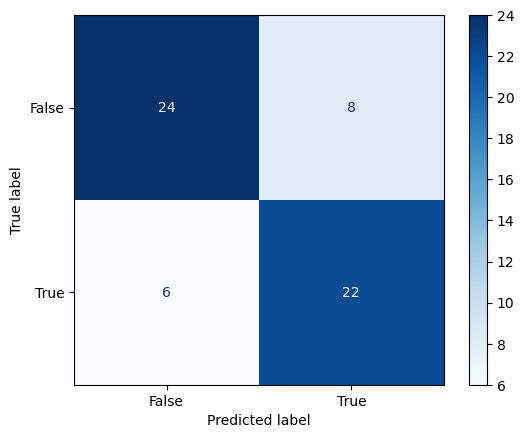

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Calcular métricas adicionales
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Mostrar métricas
print(f"Tasa de Aciertos: {accuracy:.2f}")
print(f"Precisión: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues')

Resultados de la Evaluación del Modelo:

Tasa de Aciertos: 0.77
Precisión: 0.73
Recall: 0.79
F1-Score: 0.76

7. Gráficas que permitan visualizar los resultados del modelo

7.1 1. Matriz de Confusión

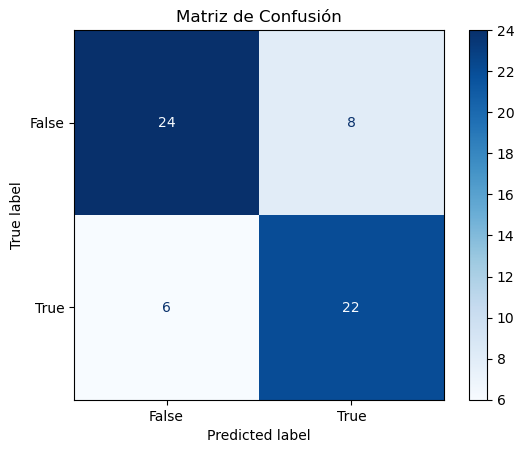

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

7.2 Curva ROC y AUC

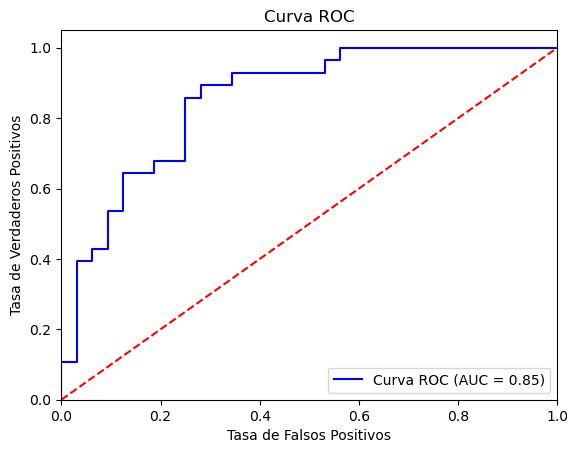

In [75]:
from sklearn.metrics import roc_curve, auc

# Calcular las probabilidades de las predicciones
y_probs = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


7.3 Gráfica de Importancia de Características

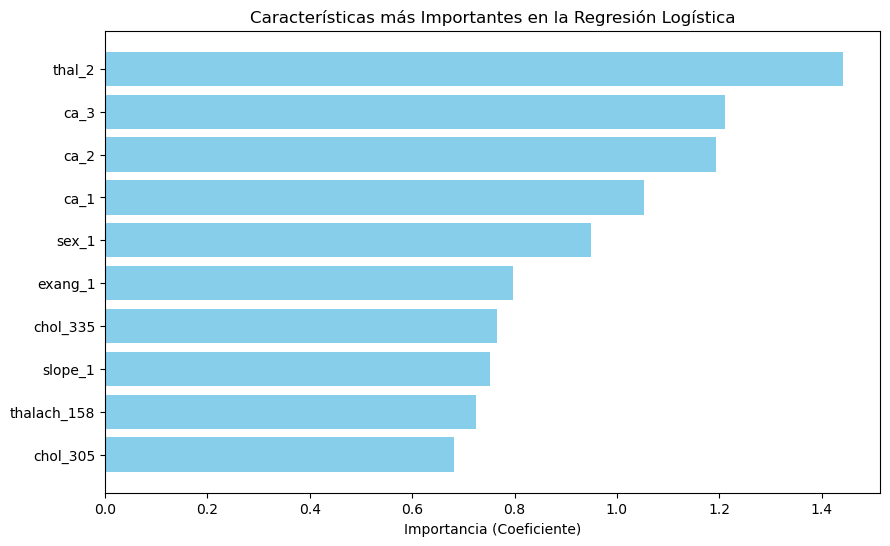

In [77]:
import numpy as np

# Obtener los coeficientes del modelo
coefficients = model.coef_[0]

# Crear un DataFrame para visualizar las características y sus importancias
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Graficar las características más importantes
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'].head(10), importance_df['Coefficient'].head(10), color='skyblue')
plt.xlabel('Importancia (Coeficiente)')
plt.title('Características más Importantes en la Regresión Logística')
plt.gca().invert_yaxis()  # Invertir el eje y para que el más importante esté arriba
plt.show()